shp - shapefile - geometry


dbf - database - extra info

prj - projection

shx - index file - makes shp faster

In [ ]:
!pip install geopandas
!pip install shapely
!pip install basemap
!pip install geopy

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

For plotting maps with no lats and longs 

In [ ]:
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

Opening shapefile

In [ ]:
#ktk : variable storing karnataka shapefile details
ktk = gpd.read_file("Karnataka_DOMSOI.shp")

In [ ]:
ktk

,SNUM,FAOSOIL,DOMSOI,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY,geometry
0,3861,Vc43-3ab,Vc,None,None,0,0,0,100,IN,29897.0,INDIA,"POLYGON ((74.46796 16.04670, 74.46384 16.04773..."
1,3867,Vp42-3a,Vp,None,None,0,0,0,100,IN,23433.0,INDIA,"POLYGON ((75.61874 17.43911, 75.62533 17.45811..."
2,3773,Lc5-2b,Lc,None,None,0,0,0,100,IN,16032.0,INDIA,"POLYGON ((76.86975 15.04402, 76.86407 15.05000..."
3,3656,Ap21-2b,Ap,06,None,0,0,0,100,IN,28315.0,INDIA,"MULTIPOLYGON (((74.37959 14.52542, 74.37930 14..."
4,3825,Ne53-2b,Ne,None,None,0,0,0,100,IN,15682.0,INDIA,"POLYGON ((74.59848 15.88088, 74.63037 15.89086..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3727,I-Lc-2bc,I,None,None,0,0,0,100,IN,226.0,INDIA,"POLYGON ((76.68986 13.39751, 76.67538 13.40340..."
57,3727,I-Lc-2bc,I,None,None,0,0,0,100,IN,193.0,INDIA,"POLYGON ((77.15258 13.62467, 77.14089 13.62789..."
58,3844,Rd23-1a,Rd,None,None,0,0,0,100,IN,55.0,INDIA,"POLYGON ((74.68792 13.48625, 74.68792 13.48986..."
59,3844,Rd23-1a,Rd,None,None,0,0,0,100,IN,70.0,INDIA,"MULTIPOLYGON (((74.37014 14.55292, 74.37014 14..."


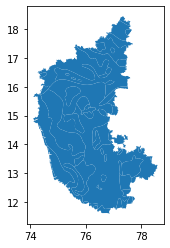

In [ ]:
ktk.plot()

Performing a test filter

In [ ]:
ktk[ktk.SQKM > 25000]

,SNUM,FAOSOIL,DOMSOI,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY,geometry
0,3861,Vc43-3ab,Vc,None,None,0,0,0,100,IN,29897.0,INDIA,"POLYGON ((74.46796 16.04670, 74.46384 16.04773..."
3,3656,Ap21-2b,Ap,06,None,0,0,0,100,IN,28315.0,INDIA,"MULTIPOLYGON (((74.37959 14.52542, 74.37930 14..."
9,3781,Lc75-2b,Lc,None,None,0,0,0,100,IN,96505.0,INDIA,"POLYGON ((76.77256 15.06512, 76.77082 15.05829..."
16,3861,Vc43-3ab,Vc,None,None,0,0,0,100,IN,50101.0,INDIA,"MULTIPOLYGON (((76.08697 17.33845, 76.09252 17..."


Test plot for filtered values

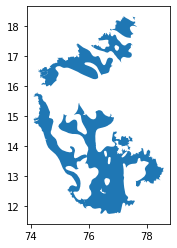

In [ ]:
ktk[ktk.SQKM > 25000].plot()

##### 1. Opening CSV with pandas
##### 2. Take lat/long and feed it to shapely, which creates a point
##### 3. Original Dataframe + geometry -> geodataframe
##### 4. Tell the new geodataframe that coordinates are lat/long

In [ ]:
df = pd.read_csv("Karnataka_DOMSOI.csv")

In [ ]:
df.head()

,X,Y,SNUM,FAOSOIL,DOMSOI,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY
0,75.306117,16.700236,3861,Vc43-3ab,Vc,NaN,NaN,0,0,0,100,IN,29897,INDIA
1,75.174449,16.535915,3867,Vp42-3a,Vp,NaN,NaN,0,0,0,100,IN,23433,INDIA
2,76.333362,15.638789,3773,Lc5-2b,Lc,NaN,NaN,0,0,0,100,IN,16032,INDIA
3,74.913578,13.856426,3656,Ap21-2b,Ap,6.0,NaN,0,0,0,100,IN,28315,INDIA
4,74.889441,14.749484,3825,Ne53-2b,Ne,NaN,NaN,0,0,0,100,IN,15682,INDIA


***Point* syntax**: Point('longitude', 'latitude')

In [ ]:
points = df.apply(lambda row: Point(row.X, row.Y), axis = 1)
# axis=1 --> scans row-wise instead of going column wise
points.head()

0     POINT (75.306116571815 16.7002363031019)
1    POINT (75.1744486119269 16.5359150194857)
2    POINT (76.3333622436388 15.6387893229459)
3     POINT (74.913577797376 13.8564258214112)
4    POINT (74.8894410432042 14.7494843546025)
dtype: object

In [ ]:
# Will throw error. The file is already as GeoDataFrame
geodf = gpd.GeoDataFrame(df, geometry=points)
#geodf.crs = {'init': 'epsg4326'}   #telling the dataframe that the values held by 'POINT' are lats/longs
geodf.head()

,X,Y,SNUM,FAOSOIL,DOMSOI,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY,geometry
0,75.306117,16.700236,3861,Vc43-3ab,Vc,NaN,NaN,0,0,0,100,IN,29897,INDIA,POINT (75.30612 16.70024)
1,75.174449,16.535915,3867,Vp42-3a,Vp,NaN,NaN,0,0,0,100,IN,23433,INDIA,POINT (75.17445 16.53592)
2,76.333362,15.638789,3773,Lc5-2b,Lc,NaN,NaN,0,0,0,100,IN,16032,INDIA,POINT (76.33336 15.63879)
3,74.913578,13.856426,3656,Ap21-2b,Ap,6.0,NaN,0,0,0,100,IN,28315,INDIA,POINT (74.91358 13.85643)
4,74.889441,14.749484,3825,Ne53-2b,Ne,NaN,NaN,0,0,0,100,IN,15682,INDIA,POINT (74.88944 14.74948)


#### CRS - Coordinate Reference System

Re-projecting to 'Mercator' (Just to test various projections)

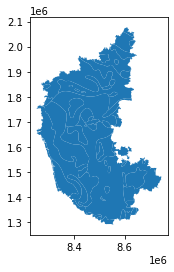

In [ ]:
ktk.to_crs({'proj' : 'merc'}).plot()

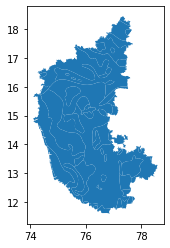

In [ ]:
ktk.plot()
#No changes in original plot despite changing to 'merc' projection

epsg.io --> site to find the EPSG codes for required states

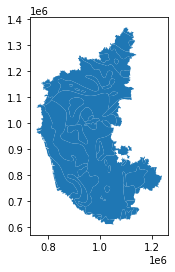

In [ ]:
  ktk.to_crs(epsg = 7780).plot()
  # instead of typing a lot of BS to mention the projection system used, mentioning the EPSG code of the place is enough

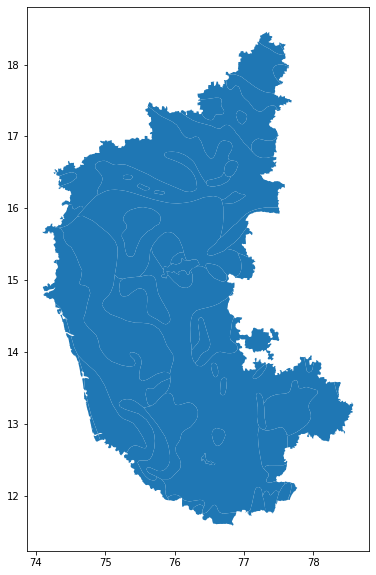

In [ ]:
ktk.plot(figsize = (20, 10)) # width, height --> tries to fill max space in the given paramater region 

Changing map color and turning off the lat/long grid

(73.87248001098645, 78.8015159606935, 11.230448055267455, 18.79915208816522)

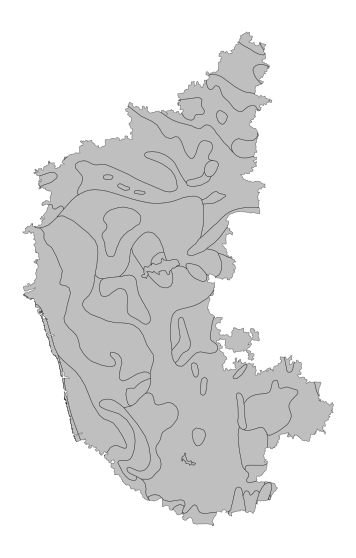

In [ ]:
ax = ktk.plot(figsize = (20, 10), color = 'gray', edgecolor = 'black', linewidth = 0.5, alpha = 0.5) # alpha --> transparency
ax.axis('off')

#### Setting Limits for smaller regions

(13.0, 15.0)

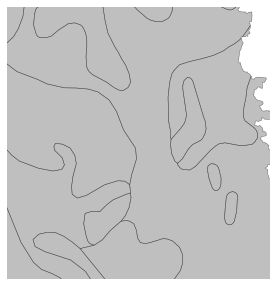

In [ ]:
ax = ktk.plot(figsize = (5, 5), color = 'gray', edgecolor = 'black', linewidth = 0.5, alpha = 0.5) # alpha --> transparency
ax.axis('off')
ax.set_xlim([75, 77])
ax.set_ylim([13, 15])